# 안녕하세요:)

## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [13]:
import pandas as pd

In [14]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [15]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [16]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [17]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_business

,자치구,택시운송업 사업체수,택시운송업 종사자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종사자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종사자수,부동산 중개 및 대리업 사업체수,부동산 중개 및 대리업 종사자수,두발미용업 사업체수,두발미용업 종사자수,커피전문점 사업체수,커피전문점 종사자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종사자수,기타주점업 사업체수,기타주점업 종사자수,일반 교과 학원 사업체수,일반 교과 학원 종사자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종사자수
0,강남구,3592,5034,4830,22972,890,974,4674,13016,2482,12510,3248,14546,768,16640,1426,5056,2852,18040,1654,10016
1,강동구,6590,9960,2202,6776,3056,3132,2376,3980,1800,2858,1092,3320,118,2866,1178,2698,1240,4208,856,2918
2,강북구,3426,5178,1930,5326,2048,2060,1178,1734,1346,1994,716,2190,80,188,1160,2550,440,1480,724,2352
3,강서구,7470,13844,2650,9168,3598,3724,2622,4704,2030,3502,1380,5060,156,1400,1588,3418,1344,4694,1162,4548
4,관악구,2572,4054,2452,7378,3158,3200,2020,4272,1790,3208,1162,4098,62,380,1316,3344,708,2460,844,3256
5,광진구,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356
6,구로구,5514,7634,2096,6430,2636,2702,1578,2426,1458,2268,842,2768,228,1846,1152,2330,672,2222,856,2992
7,금천구,2200,5196,1734,5238,1870,1994,1342,2762,976,1430,766,2430,400,5150,782,1370,306,974,600,2084
8,노원구,8228,12148,1732,5300,3460,3472,1428,2106,1564,2706,1070,3496,60,246,710,1688,1470,6562,856,3114
9,도봉구,5986,11566,1344,4018,3142,3148,1030,1588,1200,1694,576,1674,44,86,516,954,702,2324,604,1886


In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_bus_station

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040
5,광진구,269,41,2749448,2753411,118.352546,118.523137
6,구로구,486,79,4942197,4730992,119.235615,114.140076
7,금천구,345,58,3776658,3581930,123.098370,116.751304
8,노원구,514,57,4353295,4292724,88.476211,87.245168
9,도봉구,359,46,3304305,3211421,106.859356,103.855540


In [20]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='자치구')

In [21]:
pd.set_option('display.max_columns', None)
df.head()

,도착 시군구 코드,자치구,계,남자,여자,65세이상고령자,택시운송업 사업체수,택시운송업 종사자수,한식 일반 음식점업 사업체수,한식 일반 음식점업 종사자수,용달 화물자동차 운송업 사업체수,용달 화물자동차 운송업 종사자수,부동산 중개 및 대리업 사업체수,부동산 중개 및 대리업 종사자수,두발미용업 사업체수,두발미용업 종사자수,커피전문점 사업체수,커피전문점 종사자수,남녀용 겉옷 및 셔츠 도매업 사업체수,남녀용 겉옷 및 셔츠 도매업 종사자수,기타주점업 사업체수,기타주점업 종사자수,일반 교과 학원 사업체수,일반 교과 학원 종사자수,한식 육류요리 전문점 사업체수,한식 육류요리 전문점 종사자수,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),총 이동 시간(분),이동인구(평균),이동인구(합)
0,11010,종로구,153684,74018,79666,28064,215,215,1548,5912,618,646,549,889,261,480,948,3613,400,962,537,1413,110,382,437,1982,349,106,5468935,5205394,131.889620,125.534028,21.349599,9356120,44.660701,19571837.56
1,11020,중구,131450,63869,67581,24742,460,470,3176,12828,600,666,1152,2304,678,1632,1738,7084,21620,48496,762,1964,114,350,886,4242,178,103,3776675,3598932,121.020124,115.324511,21.012462,9306020,44.932366,19899691.04
2,11030,용산구,236518,114571,121947,39461,832,1046,1714,5974,910,932,1582,2428,732,1554,1268,4152,108,634,974,2664,208,1146,600,2368,323,67,4189977,4086474,137.891694,134.485421,21.364786,8514380,37.373125,14894087.30
3,11040,성동구,291609,141662,149947,46896,2400,5054,1912,5570,2144,2322,1602,2906,978,1702,1094,3718,298,3144,570,1242,516,2988,800,3090,435,58,2807280,2746738,96.377369,94.298888,21.740324,8887140,43.141640,17635698.46
4,11050,광진구,353110,169525,183585,52604,2238,3488,1926,5722,1936,1970,1742,2626,1492,2674,1180,3774,178,1374,1266,3154,826,3292,934,3356,269,41,2749448,2753411,118.352546,118.523137,22.474283,8625540,47.249420,18134138.44


In [22]:
from matplotlib import pyplot as plt
import numpy 
import seaborn as sns; sns.set()
plt.rcParams['font.family'] = 'NanumGothic'

# 이제 주어진 자료로 정류장수가 부족한 구를 찾아봅니다.


## 첫번째로 구와 관련있는 상관계수를 찾아봅니다. heatmap 으로 나타냅니다.

Text(0.5, 1.0, '상관관계')

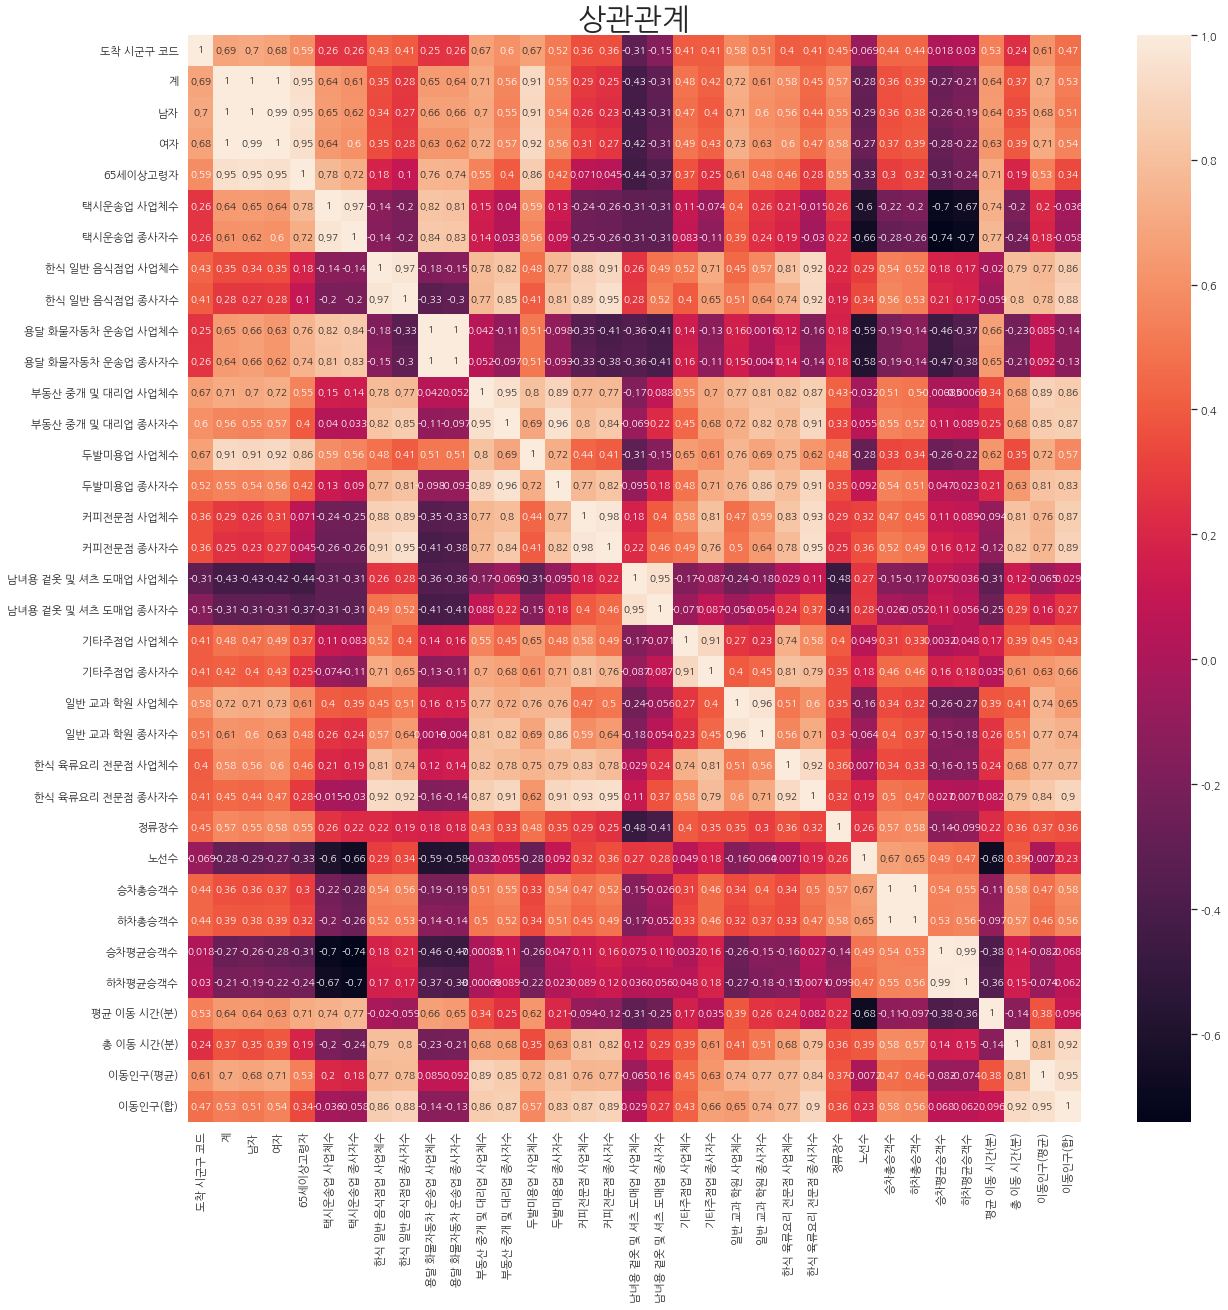

In [42]:


cor=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor, annot=True)
plt.title('상관관계', size=30)



### 상관계수가 0.5보다 높게 나오는건 승차총승객수뿐이고 그나머지는 대부분 낮게 나온다.
### 그래도 상관계수가 0.3을 보다는 높은건 부동산 중개 사업체수, 커피전문점, 기타주점업, 이동인구합 등이 있다.

### 가설 1 이동인구수가 많은 곳에 더많은 정류장 수가 있을 거다

### 가설 2 승차총승개수가 많은 곳에 더 많은 정류장 수가 있을 거다

### 가설 3 부동산 중개 및 대리업 사업체수가 많은곳에 더 많은 정류장 수가 있을거다.

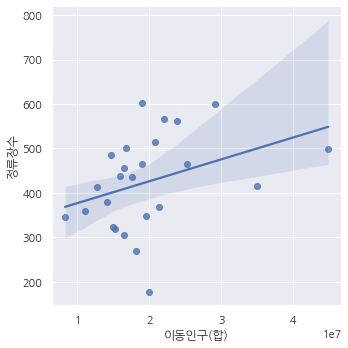

In [25]:
ax = sns.lmplot(x='이동인구(합)',y='정류장수', data=df)

# 가장 회귀선과 떨어져 있는 구가 중구이다.

In [29]:
df["이동인구당정류장수비율"] = df['정류장수']/df['이동인구(합)']
df["이동인구당정류장수비율"]

0     0.000018
1     0.000009
2     0.000022
3     0.000025
4     0.000015
5     0.000019
6     0.000027
7     0.000032
8     0.000032
9     0.000033
10    0.000025
11    0.000030
12    0.000028
13    0.000024
14    0.000021
15    0.000026
16    0.000033
17    0.000042
18    0.000018
19    0.000027
20    0.000025
21    0.000021
22    0.000011
23    0.000012
24    0.000017
Name: 이동인구당정류장수비율, dtype: float64

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


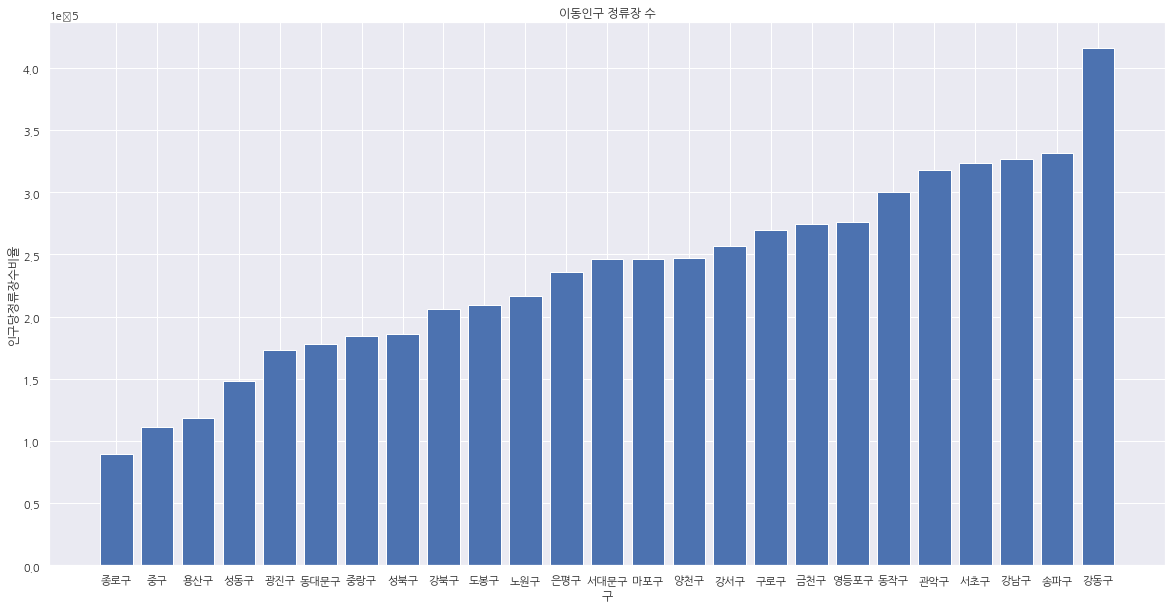

In [36]:
plt.figure(figsize=(20,10))
plt.title('이동인구 정류장 수')
plt.bar(df['자치구'],sorted(df["이동인구당정류장수비율"]))
plt.xlabel('구')
plt.ylabel('인구당정류장수비율')


plt.show()

## 정류장수로 이동인구 로 나눠서 이동인구 1인당 정류장수를 파악하였는데, 종로구 중구가 가장 낮게 나왔다.

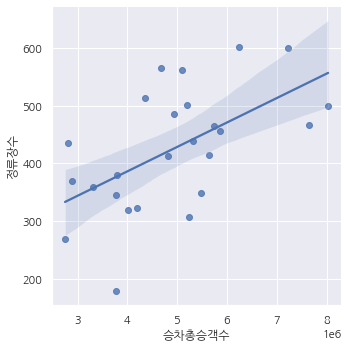

In [26]:
ax = sns.lmplot(x='승차총승객수',y='정류장수', data=df)

# 가장 밑에 떨어진 데이터수가 중구입니다.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


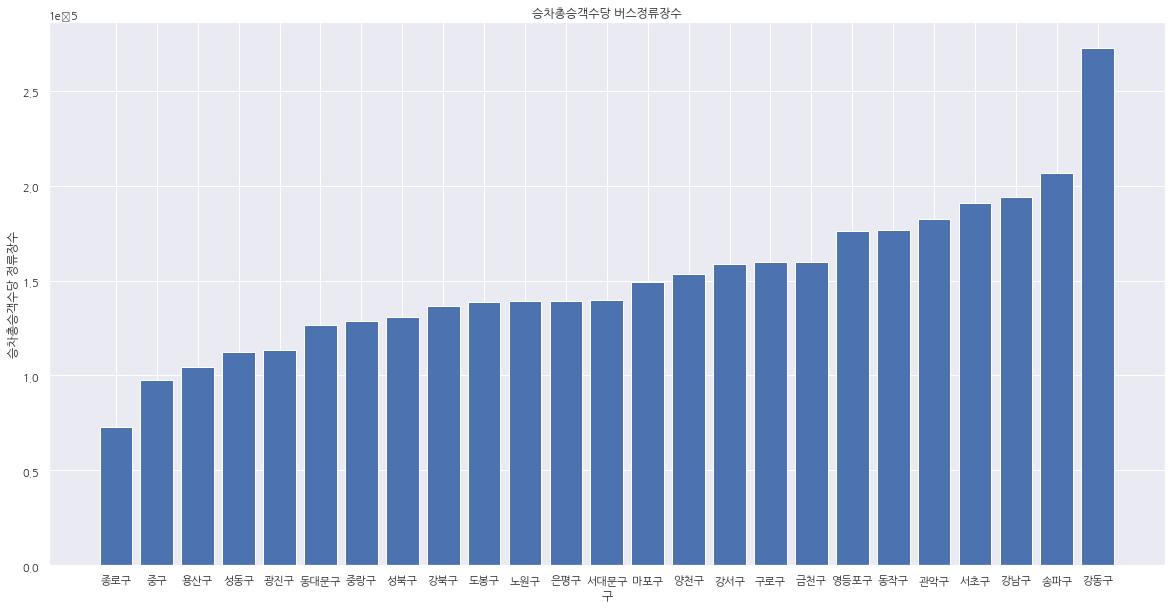

In [43]:
plt.figure(figsize=(20,10))
plt.title('승차총승객수당 버스정류장수')
plt.bar(df['자치구'],sorted(df['노선수']/df["승차총승객수"]))
plt.xlabel('구')
plt.ylabel('승차총승객수당 정류장수')


plt.show()

## 정류장수를 승차총승객수로 로 나눠서 승차총승객수 1인당 정류장수를 파악하였는데, 종로구 중구가 가장 낮게 나왔다.

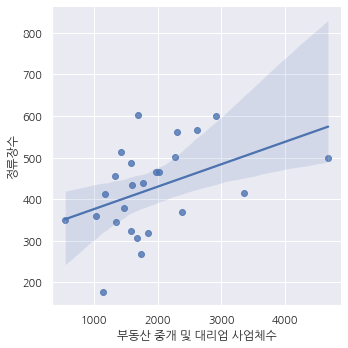

In [46]:
ax = sns.lmplot(x='부동산 중개 및 대리업 사업체수',y='정류장수', data=df)

# 가장 밑에 떨어져 있는 구는 중구이다.

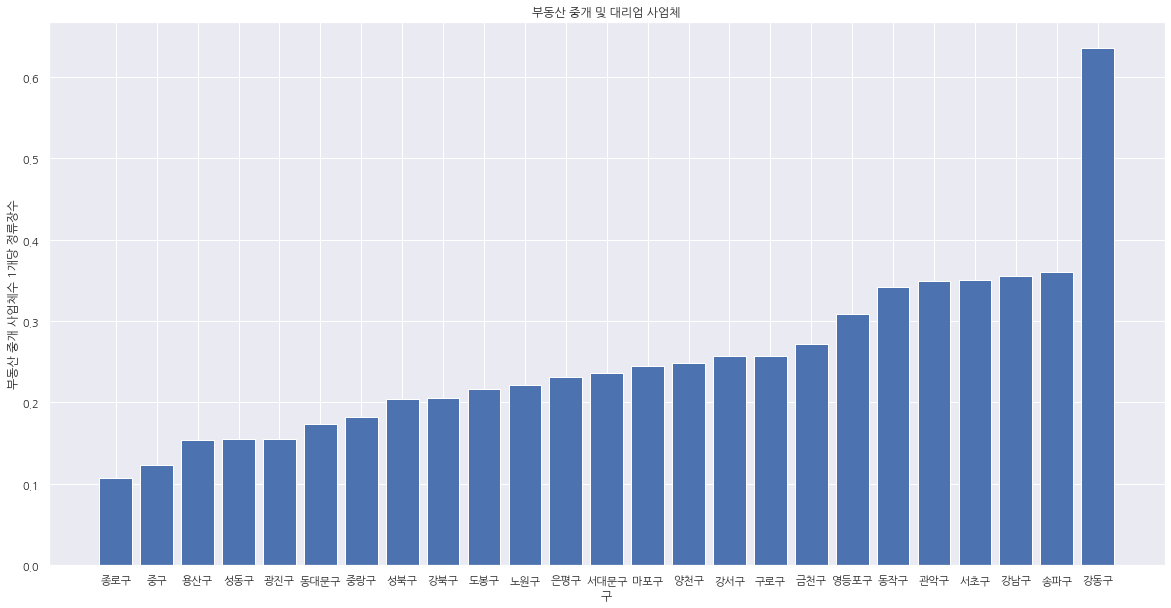

In [50]:
plt.figure(figsize=(20,10))
plt.title('부동산 중개 및 대리업 사업체')
plt.bar(df['자치구'],sorted(df['정류장수']/df["부동산 중개 및 대리업 사업체수"]))
plt.xlabel('구')
plt.ylabel('부동산 중개 사업체수 1개당 정류장수')


plt.show()

## 정류장수를 부동산 중개 및 대리업 사업체수로 나눠서 부동산 중개 및 대리업 사업체수 1개당 정류장수를 파악하였는데, 종로구 중구가 가장 낮게 나왔다.

## 결론

### 1. 회귀선과 가장 떨어져 있는건 중구로 파악됨

### 2. 비율을 확인해보면 종로구 중구 가장 낮게나옴

### 3. 비율, 회귀선과의 차이등 가장 정류장 부족한구 찾는 방안 어떤게 적절한지 고민이 필요함 

---